# Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

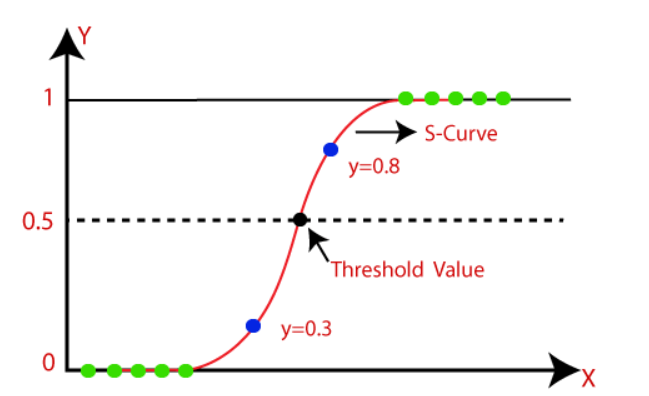

# Logistic Function (Sigmoid Function)

The sigmoid function is a mathematical function used to map the predicted values to probabilities.

It maps any real value into another value within a range of 0 and 1.

The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.

In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

# Type of Logistic Regression:

Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.

Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"

Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

# Logistic Regression Equation

The Logistic regression equation can be obtained from the Linear Regression equation. The mathematical steps to get Logistic Regression equations are given below:

We know the equation of the straight line can be written as:

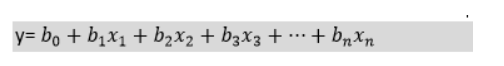

In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):

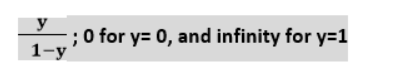

But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:

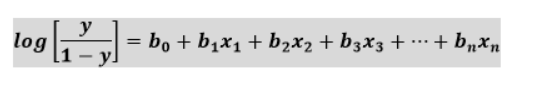

# Logistic Regression Implementation

In [1]:
#Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#To ignore the Warnings which are occured while we preprocess the dataframes

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the dataset onto a variable

train = pd.read_csv('titanic_data.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Fix the Predictor Variables
data = train[['Survived','Pclass','Sex','Age','Fare']]

In [6]:
# categorical encoding

data['Sex'] = data['Sex'].apply(lambda sex:1 if sex=="male" else 0)

In [7]:
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [8]:
#Handling missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [9]:
print(data['Age'].isnull().sum())

177


In [10]:
data["Age"]= data["Age"].fillna(data['Age'].median())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [12]:
data['Age'] = data['Age'].astype('int64')

In [13]:
# Take a look at dataframe

print(data.head())
print(data.shape)

   Survived  Pclass  Sex  Age     Fare
0         0       3    1   22   7.2500
1         1       1    0   38  71.2833
2         1       3    0   26   7.9250
3         1       1    0   35  53.1000
4         0       3    1   35   8.0500
(891, 5)


In [14]:
# Set the predictor(X) and Response(Y) Variables

X = data.drop("Survived",axis=1)
Y = data['Survived']

In [15]:
# spliting into training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify = Y,random_state=25)

# Logistic regression

In [16]:
# call logistic regression Model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,Y_train)

LogisticRegression()

In [17]:
# compute the Predictions or Y hat
Y_pred = logit.predict(X_test)

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print("confusion matrix for logistic regression\n",cm)

confusion matrix for logistic regression
 [[115  22]
 [ 25  61]]


In [24]:
#Accuracy Score
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of model using Logistic Regression is ",lr_accuracy)

Accuracy of model using Logistic Regression is  0.7892376681614349


In [25]:
# Classification Report 
from sklearn.metrics import classification_report 
report = classification_report(Y_test, Y_pred)
print("Classification Report\n" ,report)

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       137
           1       0.73      0.71      0.72        86

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



# Naive Bayes

# What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

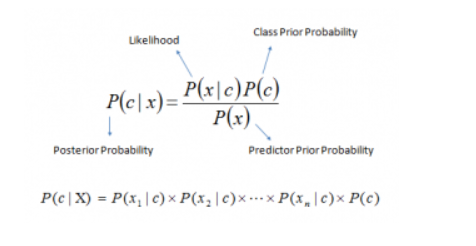

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).

P(c) is the prior probability of class.

P(x|c) is the likelihood which is the probability of predictor given class.

P(x) is the prior probability of predictor.

# How Naive Bayes algorithm works?

Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.



# 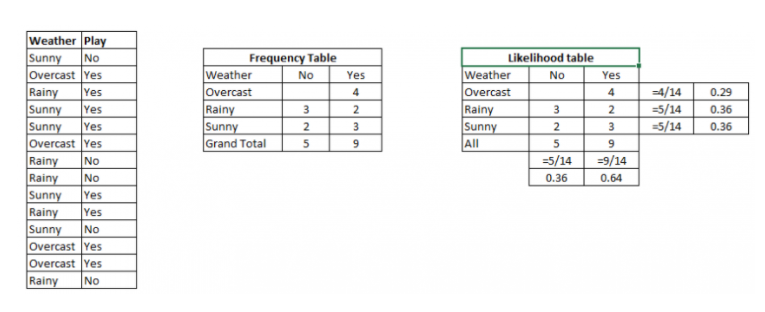

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

# Implementation of Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [28]:
classifier= GaussianNB()
classifier.fit(X_train, Y_train)

classifier.class_prior_

array([0.61676647, 0.38323353])

In [29]:
predicts=classifier.predict(X_test)
cm = confusion_matrix(Y_test, predicts)
print("confusion matrix for logistic regression\n",cm)

confusion matrix for logistic regression
 [[106  31]
 [ 24  62]]


In [34]:
GNB_accuracy=accuracy_score(predicts,Y_test)
print("Accuracy of model using Gaussian Naive Bayes classifier  is ",GNB_accuracy*100,"%")

Accuracy of model using Gaussian Naive Bayes classifier  is  75.33632286995515 %


In [35]:
report = classification_report(Y_test, predicts)
print("Classification Report\n" ,report)

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       137
           1       0.67      0.72      0.69        86

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.75      0.75       223



# Conclusion

### Logistic Regression has more accuracy than naive bayes

In [1038]:
print("Gaussian Naive Bayes",GNB_accuracy*100)
print("Logistic Regression",lr_accuracy*100)

Gaussian Naive Bayes 75.33632286995515
Logistic Regression 78.9237668161435
